In [1]:
#imports
import tensorflow as ts
import keras as ks
import matplotlib.pyplot as plt
import numpy as np
import time
import random

from numpy.random import seed
from random import randint
from keras.datasets import mnist
from keras.layers import Dense,Activation,Conv2D,MaxPool2D,Flatten
from keras.optimizers import Adam
from keras.models import Model, Input
from keras.utils import to_categorical,np_utils

def done():
    print("DONE")
def nl():
    print("")
    
done()

Using TensorFlow backend.


DONE


In [2]:
#magic numbers
seed(42)
nr_classes=10
class_labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#nr_neurons_in_layer=10
my_optimizer=Adam()
my_batch_size=128
pixels_ox=32
pixels_oy=32
my_epochs=1


done()

DONE


In [3]:
#importing dataset
#https://www.cs.toronto.edu/~kriz/cifar.html

from keras.datasets import cifar10

(image_train, label_train), (image_test, label_test) = cifar10.load_data()
done()

DONE


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)

           [6] frog


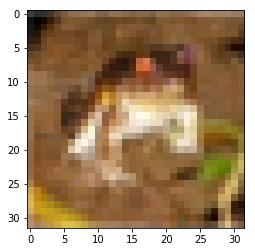


           [9] truck


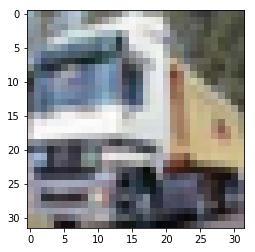


           [9] truck


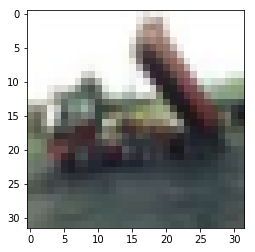


           [4] deer


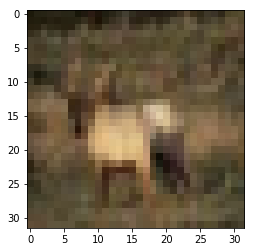


           [1] automobile


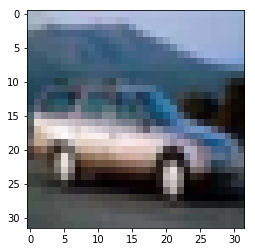


           [1] automobile


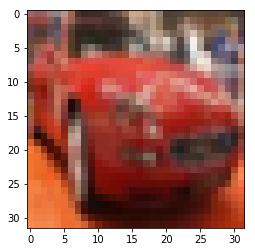


           [2] bird


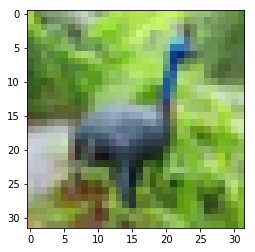


           [7] horse


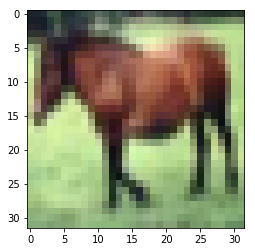


           [8] ship


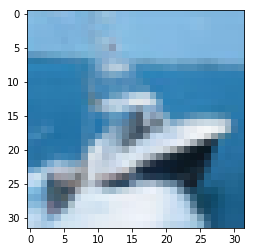


           [3] cat


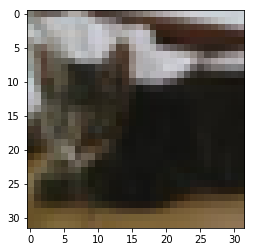


           [4] deer


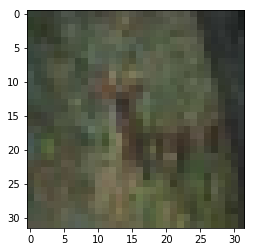


           [7] horse


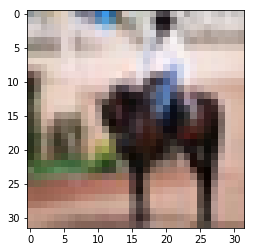


           [7] horse


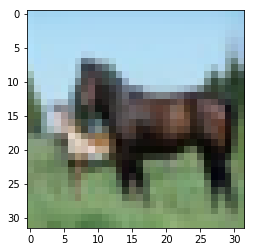


           [2] bird


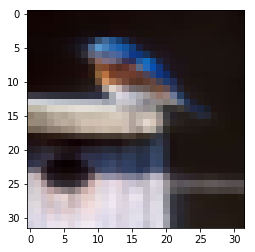


           [9] truck


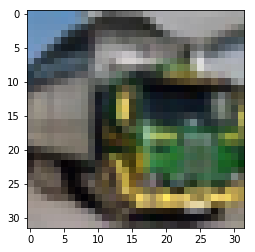


           [9] truck


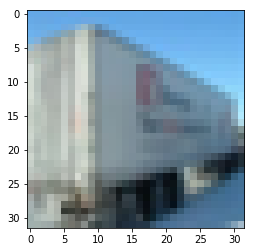


           [9] truck


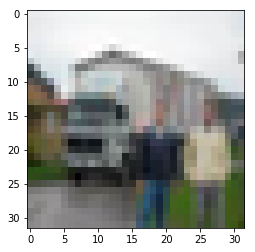


           [3] cat


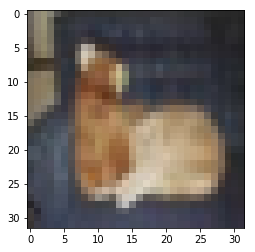


           [2] bird


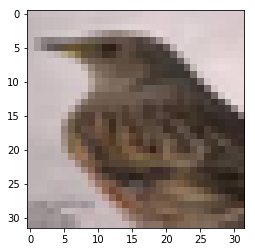


           [6] frog


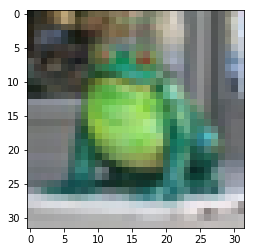


           [4] deer


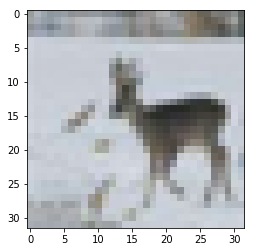


           [3] cat


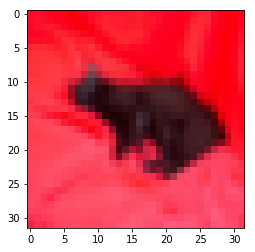


           [6] frog


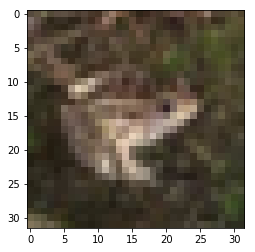


           [6] frog


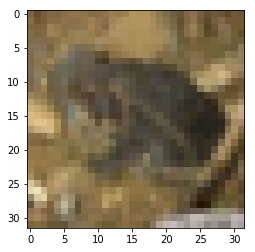


           [2] bird


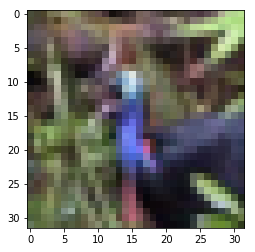


           [6] frog


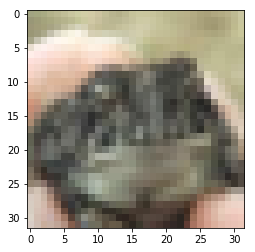


           [3] cat


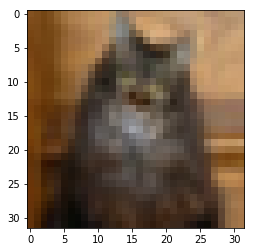


           [5] dog


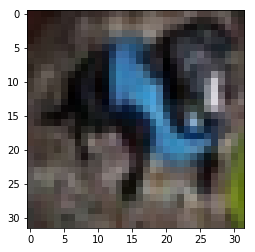


           [4] deer


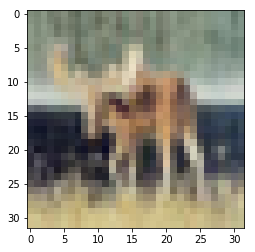


           [0] airplane


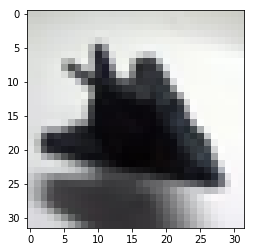


           [0] airplane


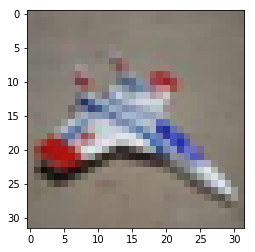


           [9] truck


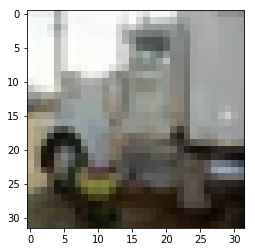


           [1] automobile


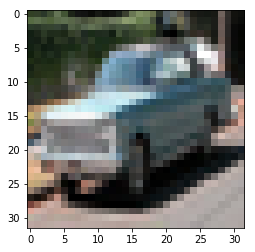


           [3] cat


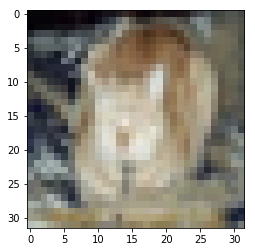


           [4] deer


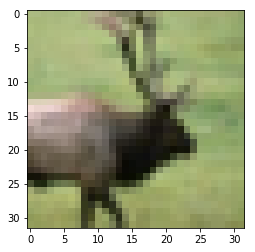


           [0] airplane


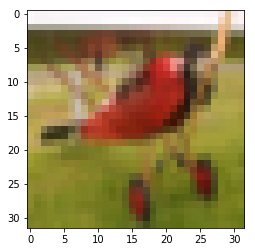


           [3] cat


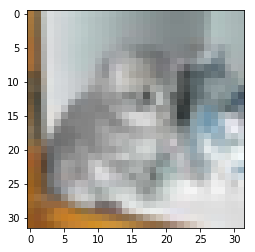


           [7] horse


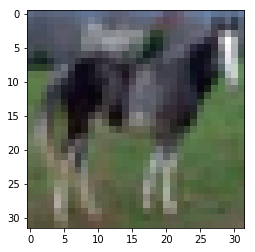


           [3] cat


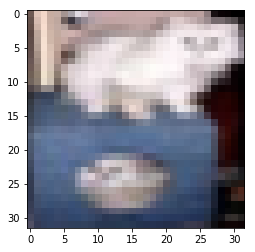


           [3] cat


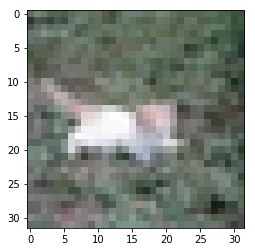

In [4]:
#inspecting the dataset

print(image_train.shape)
print(image_test.shape)
#print(image_train[0])

print(label_train.shape)
print(label_test.shape)
#print(label_train[0])

#img = np.random.rand(100,100)

for i in range(40):
    img = image_train[i]
    plt.imshow(img)
    print("")
    print("          ",label_train[i],class_labels[int(label_train[i])])
    plt.show()




In [5]:
#shaping the data
input_train=image_train.astype("float32")
input_test=image_test.astype("float32")

input_train/=255
input_test/=255

output_train=to_categorical(label_train,nr_classes)
output_test=to_categorical(label_test,nr_classes)

print(input_train.shape)
print(input_train[0])

print(output_train.shape)
print(output_train[0])


(50000, 32, 32, 3)
[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48

In [6]:
#model definition

def my_model(x):
    x=Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(x)
    x=MaxPool2D(pool_size=(2,2),strides=(2,2), padding='valid')(x)
    x=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(x)
    x=MaxPool2D(pool_size=(2,2),strides=(2,2), padding='valid')(x)
    x=Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(x)
    x=MaxPool2D(pool_size=(2,2),strides=(2,2), padding='valid')(x)
    x=Flatten()(x)
    x=Dense(50,activation='relu')(x)
    x=Dense(nr_classes,activation='softmax')(x)
    return x

done()    
    

DONE


In [7]:
#FUNCTIONAL API

my_inputs=Input((pixels_ox,pixels_oy,3))
my_outputs=my_model(my_inputs)

model = Model(inputs=my_inputs,outputs=my_outputs)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
__________

In [8]:
#compliling
model.compile(loss="categorical_crossentropy", optimizer=my_optimizer, 
             metrics=['accuracy'])

done()

DONE


In [9]:
#FITTING 

model.fit(input_train, output_train,
             epochs=my_epochs,
             batch_size=my_batch_size,
             validation_data=(input_test, output_test),
             verbose=1)

done()

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 2993s 60ms/step - loss: 1.6124 - acc: 0.4173 - val_loss: 1.3768 - val_acc: 0.5123
DONE


In [10]:
score = model.evaluate(input_test, output_test)
print("accuracy: ",score[1])

10000/10000 [==============================] - 5s 493us/step
accuracy:  0.5123
